## NN 이진 분류
- 피마 인디언 당뇨병 데이터 셋을 이용해서 당뇨병 여부 예측

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

SEED = 42

time: 698 µs (started: 2024-09-09 09:21:46 +00:00)


In [27]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.21 s (started: 2024-09-09 09:21:46 +00:00)


# 1. 데이터 준비

In [28]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

time: 187 µs (started: 2024-09-09 09:21:48 +00:00)


In [29]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.shape # 데이터의 모양을 봄

(768, 9)

time: 7.04 ms (started: 2024-09-09 09:21:48 +00:00)


In [30]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 24.1 ms (started: 2024-09-09 09:21:48 +00:00)


In [31]:
df = diabetes.copy()
df.head() # 데이터 다섯 개를 봄

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 19 ms (started: 2024-09-09 09:21:48 +00:00)


In [32]:
df.info() # 데이터의 정보를 봄

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
time: 8.02 ms (started: 2024-09-09 09:21:48 +00:00)


In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

time: 3.34 ms (started: 2024-09-09 09:21:48 +00:00)


In [34]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


time: 4.23 ms (started: 2024-09-09 09:21:48 +00:00)


<Axes: xlabel='Outcome', ylabel='count'>

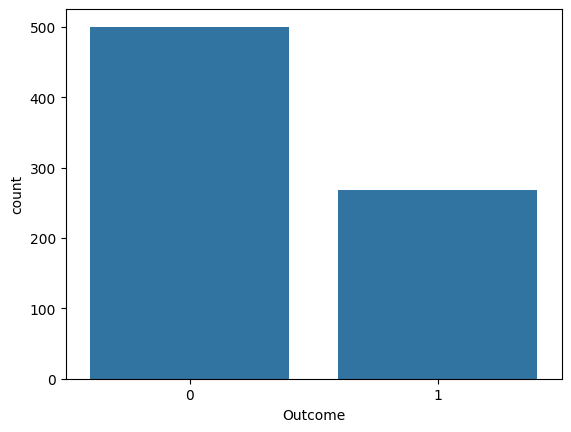

time: 190 ms (started: 2024-09-09 09:21:48 +00:00)


In [35]:
sns.countplot(x='Outcome', data=df) # 데이터의 분포를 봄

## 연속형 변수

In [36]:
tmp = df['Pregnancies'].sort_values(ascending=False)

time: 1.05 ms (started: 2024-09-09 09:21:49 +00:00)


<Axes: xlabel='None'>

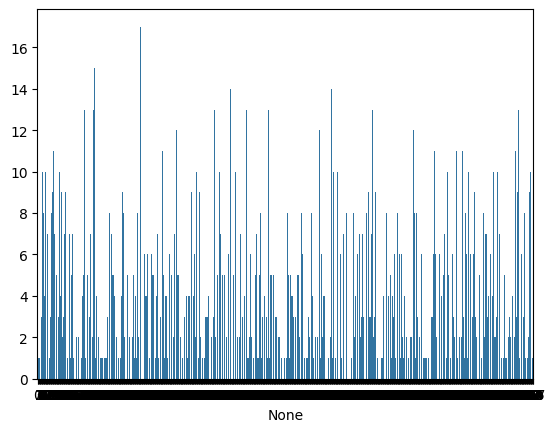

time: 14.6 s (started: 2024-09-09 09:21:49 +00:00)


In [37]:
sns.barplot(x=tmp.index, y=tmp.values)

In [38]:
# 결측치
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


time: 6.52 ms (started: 2024-09-09 09:22:03 +00:00)


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


time: 76.4 ms (started: 2024-09-09 09:22:03 +00:00)


In [40]:
# 데이터 분리

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=SEED, stratify=df['Outcome']) # 전체 데이터 (768, 9)를 9:1로 나눔
train.shape, test.shape

((691, 9), (77, 9))

time: 18 ms (started: 2024-09-09 09:22:03 +00:00)


# X, y 변수 분리

In [41]:
# 각각 결과랑 분리하기
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']

X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

time: 2.72 ms (started: 2024-09-09 09:22:03 +00:00)


In [42]:
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
median_list = []

# 결측값에 대해서 그 column의 median 값으로 대체한다.
for col in col_list:
  med = X_train[col].median()
  X_train.loc[X_train[col] == 0, col] = med
  median_list.append(med)

time: 6.87 ms (started: 2024-09-09 09:22:03 +00:00)


In [43]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
255,1,113,64,35,40,33.6,0.543,21
125,1,88,30,42,99,55.0,0.496,26
46,1,146,56,23,40,29.7,0.564,29
312,2,155,74,17,96,26.6,0.433,27
519,6,129,90,7,326,19.6,0.582,60


time: 63.7 ms (started: 2024-09-09 09:22:03 +00:00)


## scaling

In [44]:
from sklearn.preprocessing import StandardScaler

# 데이터 값을 평균이 0, 표준편차가 1인 분포로 변환하여 스케일 차이를 줄이는 기법
# 선형 모델이나 신경망에서 많이 씀
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

X_train

array([[-0.8500507 , -0.28476158, -0.66987668, ...,  0.18416848,
         0.2110448 , -1.05618828],
       [-0.8500507 , -1.11097193, -3.45488511, ...,  3.36345057,
         0.0685775 , -0.63068332],
       [-0.8500507 ,  0.80583607, -1.32517278, ..., -0.39523339,
         0.27470041, -0.37538035],
       ...,
       [-0.8500507 , -0.8135362 , -0.1784046 , ...,  0.85270911,
        -0.77410146, -0.29027936],
       [-1.1456647 , -0.58219731, -0.66987668, ...,  0.18416848,
         0.11101457, -0.97108729],
       [ 0.03679132,  0.73973924, -1.16134875, ..., -0.42494631,
        -0.56494733,  0.30542758]])

time: 9.57 ms (started: 2024-09-09 09:22:04 +00:00)


In [45]:
ss.mean_
ss.var_

array([1.14432658e+01, 9.15585198e+02, 1.49040674e+02, 8.39423684e+01,
       9.95053998e+03, 4.53074291e+01, 1.08834177e-01, 1.38079995e+02])

time: 4.19 ms (started: 2024-09-09 09:22:04 +00:00)


In [46]:
y_train_e = y_train.to_numpy()

time: 484 µs (started: 2024-09-09 09:22:04 +00:00)


# 모델 학습

In [47]:
X_train.shape

(691, 8)

time: 4.18 ms (started: 2024-09-09 09:22:04 +00:00)


In [48]:
from keras import layers

model = keras.Sequential (
    [
      layers.Dense(units=8, activation= 'relu', input_shape=(X_train.shape[1],)),
      layers.Dense(units=5, activation= 'relu'),
      layers.Dense(units=3, activation= 'relu'),
      layers.Dense(units=1, activation= 'sigmoid')
      # 이진분류 이므로 유닛은 1
      # sigmoid는 출력 값으 0~1로 변환하므로 이진 예측하기에 편리하다
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


time: 1.1 s (started: 2024-09-09 09:22:04 +00:00)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

time: 19.6 ms (started: 2024-09-09 09:22:05 +00:00)


In [50]:
model.compile(
    loss='binary_crossentropy', # 이진 분류에 주료 사용되는 손실 함수
    optimizer='adam',
    metrics=['accuracy']
)

time: 8.94 ms (started: 2024-09-09 09:22:05 +00:00)


In [51]:
# 총 100번을 돌리는데 한번에 16개씩 때려넣음

epochs = 100
batch_size = 16

history = model.fit(
    X_train,
    y_train_e,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.4038 - loss: 0.7854 - val_accuracy: 0.4388 - val_loss: 0.7573
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5319 - loss: 0.7114 - val_accuracy: 0.5252 - val_loss: 0.7069
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5897 - loss: 0.6786 - val_accuracy: 0.5827 - val_loss: 0.6800
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6926 - loss: 0.6575 - val_accuracy: 0.6331 - val_loss: 0.6611
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6717 - loss: 0.6571 - val_accuracy: 0.6547 - val_loss: 0.6485
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6986 - loss: 0.6416 - val_accuracy: 0.7050 - val_loss: 0.6358
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7309 - loss: 0.6285 - val_accuracy: 0.7266 - val_loss: 0.6266
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7213 - loss: 0.6164 - val_accuracy: 0.7266 -

In [52]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 740 µs (started: 2024-09-09 09:22:40 +00:00)


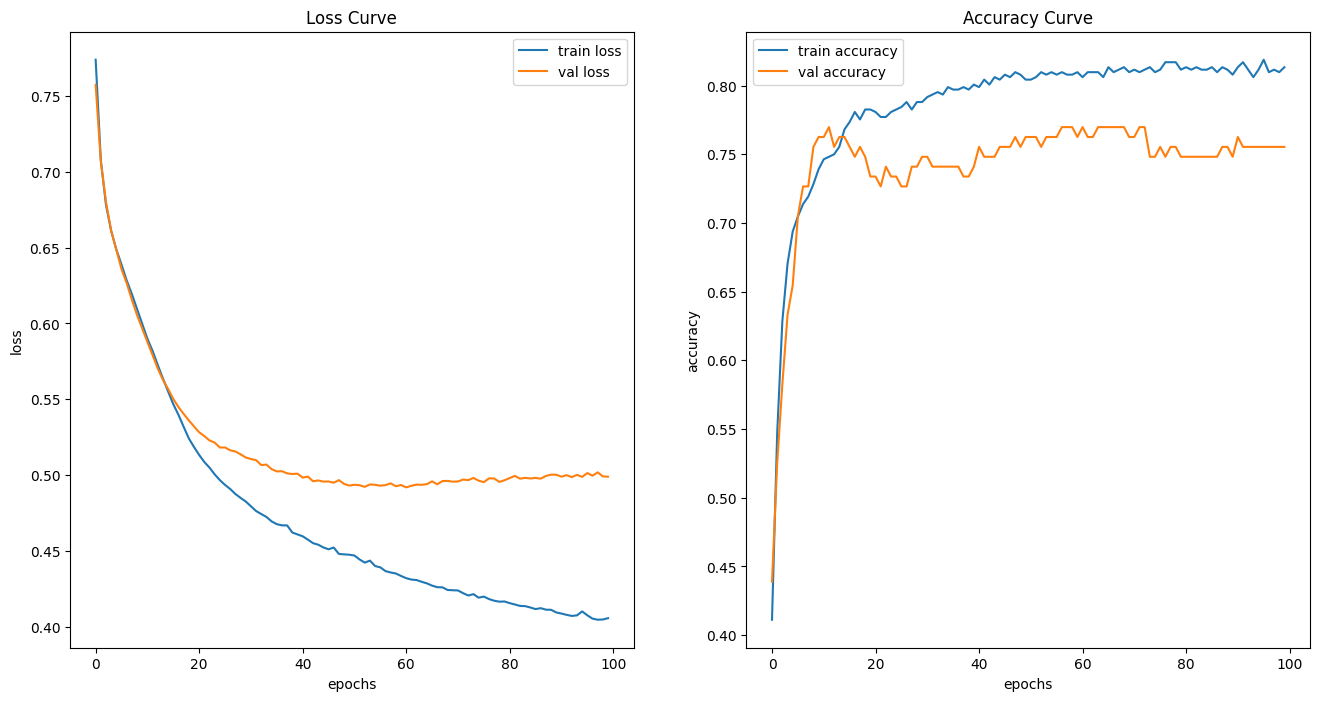

time: 444 ms (started: 2024-09-09 09:22:40 +00:00)


In [53]:
# val loss: 검증 데이터에 대한 loss값을 나타냄. 실제 예측을 저정도 오류를 가지고 한다는 소리
# train loss: 훈련 데이터에 대한 loss값. 계속 감소한다는 것. 그리고 val loss와의 차이가 벌어진다는 것은 과적합을 의미함.

plot_history(history)

### 예측

In [54]:
X_test = ss.transform(X_test)
y_test = y_test.to_numpy()

time: 4.83 ms (started: 2024-09-09 09:22:41 +00:00)


In [55]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
time: 613 ms (started: 2024-09-09 09:22:41 +00:00)


In [56]:
y_test # 실제 결과는 이러한데

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

time: 4.57 ms (started: 2024-09-09 09:22:41 +00:00)


In [57]:
y_pred = y_pred.reshape(-1)
y_pred # 예측 결과는 이러하므로 이를 통해 정확도를 알 수 있다

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

time: 4.25 ms (started: 2024-09-09 09:22:41 +00:00)


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(f'accuracy : {accuracy_score(y_test, y_pred)}')
print(f'precision : {precision_score(y_test, y_pred)}')
print(f'recall : {recall_score(y_test, y_pred)}')
print(f'f1 : {f1_score(y_test, y_pred)}')

accuracy : 0.7792207792207793
precision : 0.6666666666666666
recall : 0.7407407407407407
f1 : 0.7017543859649122
time: 12.8 ms (started: 2024-09-09 09:22:41 +00:00)


<Axes: >

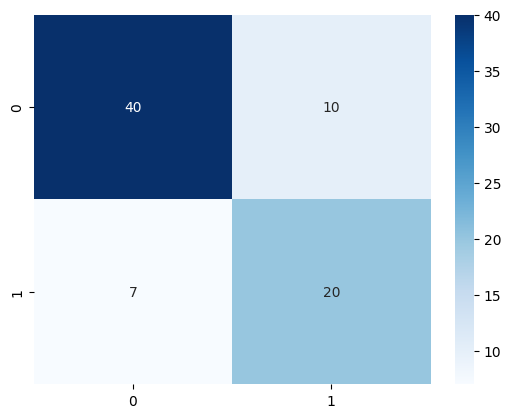

time: 231 ms (started: 2024-09-09 09:22:41 +00:00)


In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')